# DS3000 Final Project: Predicting Popular Fashion Videos through TikTok

## Team 39

- Bayden Ibrahim (ibrahim.b@northeastern.edu)
- Kush Raimalani (raimalani.k@northeastern.edu)
- Anjali Tanna (tanna.a@northeastern.edu)
- Xinwen Zhang (zhang.xinwe@northeastern.edu)

# Executive Summary
This project predicts the features that cause TikTok videos under the hashtag `#fashiontrends` to go viral, by collecting data from [TikTok](https://www.tiktok.com/tag/fashiontrends). We then used this [TikTok API](https://stevesie.com/apps/tiktok-api) to convert the `.har` file downloaded from TikTok into a json file which was then cleaned up and converted to a `DataFrame`. Using machine learning, we predict which features are related and are most important in causing virality of a TikTok. Using a Random Forest Regressor and Feature Importance, we identified that the most important features are the number of followers a user has and the number of videos made by a user. However, the least important are whether the user is verified and the number of accounts the user is following.


# Data Bias Considerations
This project may be subject to bias as there is an uneven distribution. The particular hashtag `#fashiontrends` does not have many extremly viral (>1 million likes) TikToks, therefore we ended up with a lot of unpopular videos compared to popular videos. This can be prevented by using a hastag with a more equal distribution of popular and unpopular videos.

# Introduction
Since its release in 2017, TikTok has grown to be many's go-to social media platform. As of January 2022, TikTok has reached 1 billion active monthly users with 3 billion installations ([TikTok statistics (2022)](https://influencermarketinghub.com/tiktok-stats/)). Due to TikTok's popularity, many aspiring influencers are hoping to "go viral" and gain a large platform. However, it's very hard to predict what kinds of videos will go viral, as they seem to trend for random reasons. For example, there has been a trend of new users with no followers or videos, going viral after posting a single video. This has led to speculation that the TikTok algorithm promotes new user videos, and consequently, advise for users to create multiple accounts([Frank Niu](https://vm.tiktok.com/TTPdSgjgxa/)). However, noone knows exactly how the TikTok algorithm works, and so predicting what could make a video trend does not have a clear cut solution.  

Extracted data from TikTok can provide a substantial amount of information including likes, comments, shares, and play counts, that together define the meaning of virality, as well as many other features such as music choice, creator follower count, etc. 

**The goal of this project is to identify relationships between TikTok's features and the popularity of a video.**

# Data Description

While TikTok provides an official API for aspiring developers, its utilization requires specific signatures that make the process extremely troublesome. For that reason, we decided to web scrape the data following instructions from [this video](https://www.youtube.com/watch?v=7AAwtCR7f4w). The data that we collected is from a For You Page without logging into an account in order to minimize user bias. The resulting `.har` file was used [here](https://stevesie.com/apps/tiktok-api) to generate the `json` data of the trending videos. The following features were collected: 

- vidId
- caption
- hashtags
- numHashtag
- duration (s)
- uniqueId
- verified
- musicId
- musicTitle
- likeCount
- shareCount
- commentCount
- viewCount
- followingCount
- followerCount
- videoCount

After uploading the `.har` file to the site mentioned above, it was converted into 63 `json` files. We combined these files into one large `json` file and then converted it to a `DataFrame`.

In [1]:
# Extraction
import pandas as pd

df = pd.read_json('NEWTTDATA.json')
df.head()

,statusCode,itemList,cursor,hasMore
0,0,"{'id': '7004421700007841030', 'desc': 'Septemb...",1860,True
1,0,"{'id': '7058583535610809605', 'desc': 'je fais...",1860,True
2,0,"{'id': '6988932280295230725', 'desc': 'trends ...",1860,True
3,0,"{'id': '6993764316159741190', 'desc': 'gimme g...",1860,True
4,0,"{'id': '6977481930044493061', 'desc': 'Reply t...",1860,True


In [2]:
# Transformation and Loading

# list of trending videos 
trending_videos = df['itemList']

# initialize dataframe
df_tiktok = pd.DataFrame()

for vid_idx in range(1917): 
    vid = trending_videos[vid_idx]
    s_tiktok = pd.Series()
    
    # unique video id
    s_tiktok['vidId'] = [vid['id']][0]
    
    # video caption
    s_tiktok['caption'] = [vid['desc']][0]
     
    # video hashtags
    # if the video has hashtags
    if 'textExtra' in vid.keys():
        # initialize list to store hashtags
        hashtag_list = []
        for idx in range(len(vid['textExtra'])):
            hashtag = vid['textExtra'][idx]['hashtagName']
            # if hashtag is not empty string
            if hashtag != '':
                hashtag_list.append(hashtag)
        # store hashtags into dataframe
        s_tiktok['hashtag'] = hashtag_list
        s_tiktok['numHashtag'] = len(hashtag_list)
    
    # video duration in seconds
    s_tiktok['duration (s)'] = [vid['video']['duration']][0]
    
    # creator id, username, verification status, private account
    s_tiktok['uniqueId'] = vid['author']['uniqueId']
    s_tiktok['verified'] = vid['author']['verified']
    
    # music id, music title
    s_tiktok['musicId'] = vid['music']['id']
    s_tiktok['musicTitle'] = vid['music']['title']
    
    # like, share, comment, play
    s_tiktok['likeCount'] = vid['stats']['diggCount']
    s_tiktok['shareCount'] = vid['stats']['shareCount']
    s_tiktok['commentCount'] = vid['stats']['commentCount']
    s_tiktok['viewCount'] = vid['stats']['playCount']
    
    # creator following, follower, number of posts
    s_tiktok['followingCount'] = vid['authorStats']['followingCount']
    s_tiktok['followerCount'] = vid['authorStats']['followerCount']
    s_tiktok['videoCount'] = vid['authorStats']['videoCount']
    
    df_tiktok = df_tiktok.append(s_tiktok, ignore_index = True)
    
# some features that are false are showing as 0.0, and true as 1.0
# make everything uniform -- only showing as True or False
df_tiktok['verified']= df_tiktok['verified'].apply(lambda x: True if x == 1.0 else x)

/var/folders/3x/09qtw5n97t7cddrhx1vknvfw0000gn/T/ipykernel_75468/3428355507.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_tiktok = pd.Series()


In [3]:
df_tiktok.head()

,vidId,caption,hashtag,numHashtag,duration (s),uniqueId,verified,musicId,musicTitle,likeCount,shareCount,commentCount,viewCount,followingCount,followerCount,videoCount
0,7004421700007841030,September must have!!! PART 1🤎 #fashionhacks #...,"[fashionhacks, fashiontrends]",2.0,31.0,_emmaaasss,0.0,6709415906423867393,Sex and the City (Main Theme),12200.0,24.0,38.0,68300.0,831.0,222600.0,858.0
1,7058583535610809605,je fais quelle couleur ensuite guys ? 💖😘 @clai...,"[@clairelatour, tiktokfashion, mode, conseilsm...",6.0,14.0,clairelatour,0.0,6863118485925398530,Baby Work It,6123.0,9.0,60.0,57100.0,403.0,391600.0,896.0
2,6988932280295230725,trends to invest in…because they’ll be here fo...,"[fashiontrends, fashiontrends2021, 2022fashion...",4.0,10.0,rachelnoelleclark,0.0,6979312907339254533,son original,6032.0,116.0,16.0,59700.0,225.0,202600.0,603.0
3,6993764316159741190,gimme gogo boots and opera gloves I’ll be a ha...,"[falltrends2021, fashiontrends2021, fashiontre...",3.0,46.0,taylortiminskas,0.0,6789995456064669697,Juless Edits,6026.0,53.0,36.0,39100.0,38.0,163100.0,478.0
4,6977481930044493061,Reply to @itsveronicaustin Club Kid fashion de...,"[clubkid, fashiontrends, trendcycle, fashioncy...",4.0,27.0,oldloserinbrooklyn,True,96226181,Vogue,6001.0,66.0,62.0,36300.0,552.0,327900.0,431.0


# Method
## 1 - Random Forest Regressor 

To measure popularity in this project, we are using the number of views in a video as our main parameter. 

We did a primary analysis of our data by plotting a histogram of the distribution of views in our data. As you can see, there are a lot more “unpopular” videos compared to “popular” videos.

***INSERT HISTOGRAM****

#### Sample Weight

Because we had more ‘unpopular’ videos than popular videos in our dataset, we needed to balance out the weights of popular and unpopular videos. To do this, we used the sample weight parameter of Random Forest Regression to balance out the distribution. To achieve this, we used the square root of the number of views as the weight of each video. 

`y_weight = npm.sqrt(y_true)`

#### Scale Normalization
We also had to consider the large differences in average distance of each feature, so we also performed scale normalization.

We performed the random forest regression with the 6 features on the left to predict the view count while considering parameters like cross validation, sample weight, and scale normalization. 

****how did we decide on these 6 features?*****

* `numHashtag`
* `duration (s)`
* `verified`
* `followingCount`
* `followerCount`
* `videoCount`

By using Random Forest Regression while considering these parameters, we can ensure that the algorithm scales well, properly quantifies how important each of the features is to succesful classification, and does not overfit.

## 2 - Feature Importance

We plotted the feature importances of the 6 features used in the random forest regressor to find the most important features and least important features are determining and driving popularity of videos. 

## 3 - Correlation Matrix

For additional analysis regarding the hashtags used in the TikToks, we utilized a correlation matrix. This matrix shows the top 10 most commonly used hashtags from our videos, and a comparison of which were used most frequently together. This tool was useful in summarizing our dataset and in identifying and visualizing patterns in the comparison of the features.

# Results

### Scale Normalization

In [4]:
# x features to 
x_feat_list = ['numHashtag', 'duration (s)', 'verified', 'followingCount', 'followerCount', 'videoCount']

# initialize dataframe to store scaled values
df_tiktok_scaled = pd.DataFrame()

for feat in x_feat_list: 
    # scale by dividing by standard deviation
    df_tiktok_scaled[f'{feat}_scaled'] = df_tiktok[feat] / df_tiktok[feat].std()

# add viewCount back into dataframe
df_tiktok_scaled['viewCount'] = df_tiktok['viewCount']

In [5]:
df_tiktok_scaled.head()

,numHashtag_scaled,duration (s)_scaled,verified_scaled,followingCount_scaled,followerCount_scaled,videoCount_scaled,viewCount
0,0.619664,1.443591,0.0,1.465507,0.292550,1.290296,68300.0
1,1.858991,0.651944,0.0,0.710709,0.514657,1.347441,57100.0
2,1.239327,0.465674,0.0,0.396798,0.266265,0.906816,59700.0
3,0.929496,2.142102,0.0,0.067015,0.214353,0.718836,39100.0
4,1.239327,1.257321,3.614622,0.973477,0.430940,0.648155,36300.0


### Random Forest Regression

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# features to train on / predict
x_feat_list = ['numHashtag_scaled', 'duration (s)_scaled', 
               'verified_scaled', 'followingCount_scaled',
               'followerCount_scaled', 'videoCount_scaled']
y_feat = 'viewCount'

# extract features to train on / predict
x = df_tiktok_scaled.loc[:, x_feat_list].values
y_true = df_tiktok_scaled.loc[:, y_feat].values

# sample weight using square root of views
y_weight = np.sqrt(y_true)

# initialize a random forest regressor
rf_reg = RandomForestRegressor()

# set number of folds
n_splits = 5

# cross validation
skfold = StratifiedKFold(n_splits=n_splits)

# store predicted values
y_pred = np.empty_like(y_true)

for train_idx, test_idx in skfold.split(x, y_true):
    # index to split training / test data
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_true_train = y_true[train_idx]
    
    # index to get sample weight
    y_weight_train = y_weight[train_idx]

    # fit regressor to data
    rf_reg = rf_reg.fit(x_train, y_true_train, sample_weight=y_weight_train)

    # estimate each property's price
    y_pred[test_idx] = rf_reg.predict(x_test)
    
# cross validated R2 score
r2_score(y_true=y_true, y_pred=y_pred)

/Users/xinwenzhang/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7742052396126052

### Predicted vs True Values Scatter

Text(0.5, 1.0, 'Predicted vs True Views')

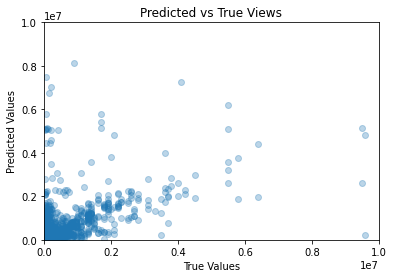

In [7]:
# scatter the predicted values and true values
plt.scatter(y_true, y_pred, alpha=0.3)

# set x and y lim to better visualize
plt.xlim(0,1E7)
plt.ylim(0,1E7)

# label x and y axes
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# label title
plt.title('Predicted vs True Views')

### Feature Importance

In [8]:
# feature importance plotting function from class notes

def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Tree Regressors)')

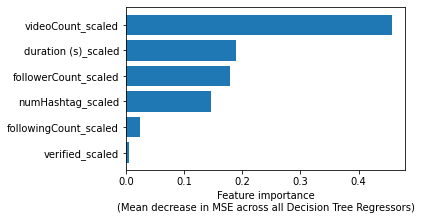

In [9]:
# plot the feature importances
plot_feat_import(x_feat_list, rf_reg.feature_importances_)

### Scatter Plots of Important Features

In [10]:
# list of features to log
feat_list = ['videoCount', 'followerCount', 'duration (s)', 'viewCount']

# initialize dataframe to store logged values
df_tiktok_log = pd.DataFrame()

for feat in feat_list: 
    # get the log base 10
    df_tiktok_log[f'{feat}_log'] = np.log10(df_tiktok[feat])
    
df_tiktok_log.head()

/Users/xinwenzhang/opt/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,videoCount_log,followerCount_log,duration (s)_log,viewCount_log
0,2.933487,5.347525,1.491362,4.834421
1,2.952308,5.592843,1.146128,4.756636
2,2.780317,5.306639,1.000000,4.775974
3,2.679428,5.212454,1.662758,4.592177
4,2.634477,5.515741,1.431364,4.559907


#### videoCount vs. viewCount

Text(0.5, 1.0, 'videoCount vs. viewCount')

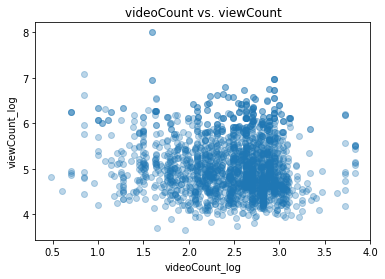

In [11]:
# extract videoCount and viewCount
videos = df_tiktok_log['videoCount_log']
views = df_tiktok_log['viewCount_log']

# plot the scatter
plt.scatter(videos, views, alpha=0.3)

# label x and y axes
plt.xlabel('videoCount_log')
plt.ylabel('viewCount_log')

# label title
plt.title('videoCount vs. viewCount')

#### followerCount vs. viewCount

Text(0.5, 1.0, 'followerCount vs. viewCount')

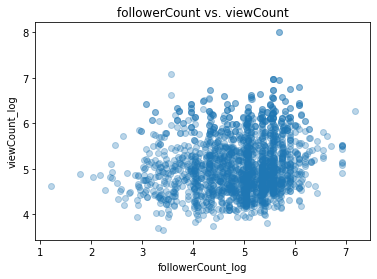

In [12]:
# extract followerCount and viewCount
followers = df_tiktok_log['followerCount_log']
views = df_tiktok_log['viewCount_log']

# plot the scatter
plt.scatter(followers, views, alpha=0.3)

# label x and y axes
plt.xlabel('followerCount_log')
plt.ylabel('viewCount_log')

# label title
plt.title('followerCount vs. viewCount')

#### duration (s) vs. viewCount

Text(0.5, 1.0, 'duration (s) vs. viewCount')

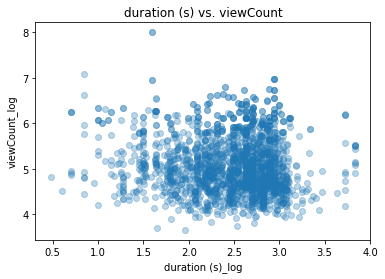

In [13]:
# extract duration (s) and viewCount
duration = df_tiktok_log['duration (s)_log']
views = df_tiktok_log['viewCount_log']

# plot the scatter
plt.scatter(videos, views, alpha=0.3)

# label the x and y axes
plt.xlabel('duration (s)_log')
plt.ylabel('viewCount_log')

# label title
plt.title('duration (s) vs. viewCount')

### Hashtag Correlation Matrix

/Users/xinwenzhang/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


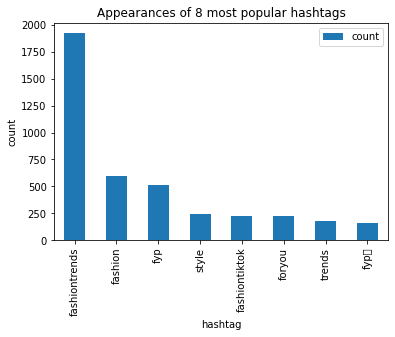

In [14]:
# get dataframe of only hashtags
df_hashtags = df_tiktok['hashtag'].to_frame()

# separating hashtag lists into separate columns
df_hashtags_sep = pd.DataFrame([hashtag 
                                      for hashtags_list in df_hashtags['hashtag']
                                      for hashtag in hashtags_list], columns=['hashtag'])

# number of unique hashtags
df_hashtags_sep['hashtag'].unique().size

# count of appearances of each hashtag
df_popular_hashtags = df_hashtags_sep.groupby('hashtag').size()\
                                        .reset_index(name='count')\
                                        .sort_values('count', ascending=False)\
                                        .reset_index(drop=True)

# create bar graph of popular hashtags
df_popular_hashtags.head(8).plot(kind='bar', x='hashtag', y='count')

# label x and y axes
plt.xlabel('hashtag')
plt.ylabel('count')

# label title
plt.title('Appearances of 8 most popular hashtags')

# plot figure
plt.show()

/Users/xinwenzhang/opt/miniconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/Users/xinwenzhang/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


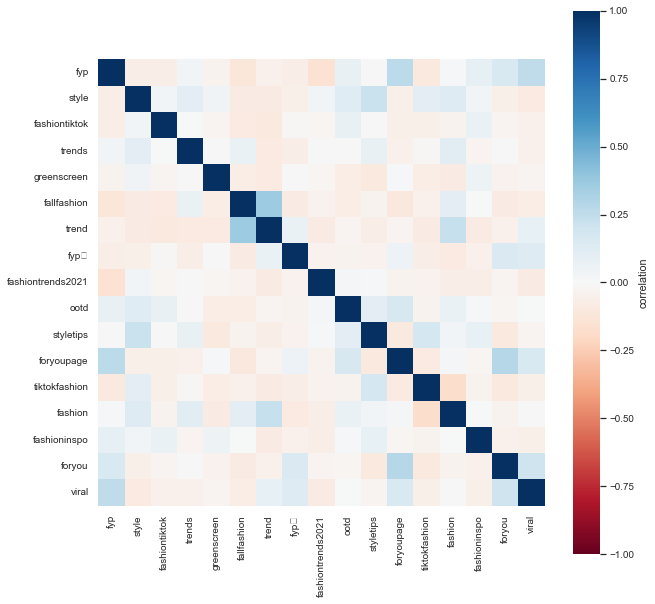

In [15]:
import seaborn as sns

# dropping #fashiontrends hashtag (since all videos have them)
df_popular_hashtags.drop(index=df_popular_hashtags.index[0], 
        axis=0, 
        inplace=True)

# hashtags which appear at least 100 times
at_least_100 = 100

# popular hashtags into a set
pop_hashtags_set = set(df_popular_hashtags[
                           df_popular_hashtags['count']>=at_least_100
                           ]['hashtag'])

# popular hashtags column
df_hashtags['popularHashtags'] = df_hashtags['hashtag'].apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in pop_hashtags_set])

# drop rows without popular hashtag
df_popular_hashtags = df_hashtags.loc[
            df_hashtags['popularHashtags'].apply(lambda hashtag_list: hashtag_list !=[])]

# new dataframe
hashtag_vec = df_popular_hashtags.loc[:, ['popularHashtags']]


for hashtag in pop_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vec['{}'.format(hashtag)] = hashtag_vec['popularHashtags'].apply(
        lambda hashtag_list: int(hashtag in hashtag_list))
    
# drop the popularHashtags column
hashtag_mat = hashtag_vec.drop('popularHashtags', axis=1)

# correlation matrix
corr_mat = hashtag_mat.corr()

# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.9)
sns.heatmap(corr_mat,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

### ignore this. just playing with one hot encoding. might work but not sure what to do with it

In [21]:
s = df_tiktok['hashtag'].explode()
df_one_hot = df_tiktok.join(pd.crosstab(s.index, s))

# Discussion

### Regression Analysis - need to interpret chart 

To predict popularity of Fashion TikTok videos, a Random Forest Regression was performed with the 6 features - `Number of Hashtags`, `Duration in seconds`, `Whether the user is verified or not`, `Number of accounts the user is following`, `Number of accounts following the user`, and `Number of videos posted by the user`- to predict the view count while considering parameters like cross validation, sample weight and scale normalization. 

The chart `predicted vs true views` shows the result of our regression. Further calculations resulted in an R-squared value of 0.769, which suggests that our model did a decent job at predicting the number of views. 



### Feature Importance Analysis

After plotting the feature importance of the features used in the Random Forest Regressor, it  can be concluded that the most important features were the number of videos made by a creator, the number of followers a creator has, and the duration of the video. The least important features were whether or not the creator is verified and the number of accounts the creator is following. These results were expected, since we intutively knew that it is very important to keep posting TikTok to actually let some of them go viral. Further, there are a very few people who are verified on TikTok and this feature may suffer due to less data points during the collection process.

### Trend Analysis 

There were several features that we thought would contribute to the popularity of a TikTok, and scatter plots were plotted to check if there was a correlation between these features and number of views

1. `videoCount` vs. `viewCount`
- Knowing that video count was the most important feature in our regression model, we scattered the video count with the view count to see their correlation. Unfortunately, this plot does not really show any distinct relationship between the two.

2. `followerCount` vs. `viewCount`
- Similar to the video count, we scattered follower count with views, and there is a slight positive correlation. This is as expected since the number of followers is a pretty obvious determinant of popularity. 

3. `duration (s)` vs. `viewCount`
- We were hoping to see a negative correlation with this duration vs view count plot, but unfortunately, we also didn’t see any distinct relationships. 

### Hashtag Analysis
This project also includes additional analysis regarding the hashtags used in the TikToks. The last graph of the project is a correlation matrix that shows the top 10 most commonly used hashtags from our videos, and a comparison of which were used most frequently together. As you can see, the hashtag `#fashiontiktok` appeared the most with hashtags `#fashioninspo`, `#style`, `#trends`, and `#ootd`. It appears the least with hashtags `#fallfashion`, `#fyp`, `#tiktokfashion`, and `#foryoupage`. What can be interpreted from this is that TikToks with a broader range of hashtags would be recommended, as it will reach a wider audience, whereas using different iterations of similar words for the hashtags will be redundant. Although this correlation matrix alone doesn’t indicate that having a variety of hashtags increases the video’s popularity, intuitively, that’s a conclusion that could be made. 



# Takeaways

This is a relatively basic analysis of what makes a TikTok video popular. We weren’t able to use one-hot encoding with the hashtags due to the way it was stored in the dataframe. A lot of our issues were with our initial data collection, and we can’t be entirely sure whether the sample weight parameter fixed all the problems with uneven distribution of views. In addition, we know what features are important, but still not sure which “direction” the features should go in as our scatter plots were inconclusive. 

In the future, it would be interesting to use one-hot on hashtags to see if certain hashtags increase the popularity of the video. We could also try the model on different hashtags to see if we get similar results. A more in-depth investigation could include analysis of non-numerical data, such as music choice, which is beyond the scope of this course. 